In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=pd.read_csv("/content/HumanResources.csv")

In [ ]:
df

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,employee_id,first_name,last_name,gender,state,city,hire_date,department,job_title,education_level,performance_rating,overtime,base_salary,salary,birth_date,termination_date
0,00-73695798,Olimpiada,Fedotova,Female,Moscow,Moscow,28-08-2017,Sales,Sales Specialist,Bachelor,Good,No,79104,84511,25-07-1994,NaN
1,00-81018730,Ljubov',Baranova,Female,Moscow,Moscow,19-05-2022,Customer Service,Support Specialist,Bachelor,Satisfactory,Yes,54030,58165,04-12-1983,NaN
2,00-29139495,Mstislav,Trofimov,Male,Moscow,Moscow,10-04-2018,Operations,Operations Analyst,Master,Good,No,55805,60266,17-05-1974,NaN
3,00-60298696,Rodion,Pahomov,Male,Moscow,Moscow,11-11-2019,Sales,Sales Representative,Bachelor,Needs Improvement,No,53844,64566,02-05-1995,NaN
4,00-96356860,Zosima,Naumov,Male,Kazan,Kazan,01-01-2023,Operations,Inventory Specialist,High School,Needs Improvement,No,58672,61998,13-07-2004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,00-33964768,Kallistrat,Ovchinnikov,Male,Moscow,Moscow,16-01-2022,Operations,Operations Analyst,Bachelor,Good,No,72819,87473,03-05-1985,NaN
721,00-52644581,Vitalij,Mironov,Male,Moscow,Moscow,26-08-2018,Operations,Inventory Specialist,High School,Needs Improvement,No,54546,59413,17-01-2000,27-11-2022
722,00-24298519,Sidor,Korolev,Male,Moscow,Moscow,26-05-2016,IT,IT Support Specialist,High School,Satisfactory,Yes,52016,55945,10-05-1998,NaN
723,00-24640648,Ljubim,Ovchinnikov,Male,Moscow,Moscow,17-12-2020,Customer Service,Support Specialist,High School,Needs Improvement,Yes,51441,56897,29-06-2000,24-11-2023


In [ ]:
df['Attrition']=df['termination_date'].notna().astype(int)

drop un-necessary coumns

In [ ]:
df.drop(columns=['employee_id','first_name','last_name','termination_date'],inplace=True)

date feature engineering


In [ ]:
df['hire_date']=pd.to_datetime(df['hire_date'])
df['birth_date']=pd.to_datetime(df['birth_date'])

df['age']=(pd.Timestamp.today() - df['birth_date']).dt.days //365
df['experience_years']=(pd.Timestamp.today() - df['hire_date']).dt.days //365

df.drop(columns=['hire_date','birth_date'],inplace=True)

/tmp/ipython-input-1498923897.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hire_date']=pd.to_datetime(df['hire_date'])
/tmp/ipython-input-1498923897.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['birth_date']=pd.to_datetime(df['birth_date'])


Encode binary and ordinal features

In [ ]:
df['gender']=df['gender'].map({'Female':0,'Male':1})
df['overtime']=df['overtime'].map({'Yes':1,'No':0})

education_map={'High School':1,'Bachelor':2,'Master':3,'PhD':4}
df['education_level']=df['education_level'].map(education_map)

performance_map={
    'Needs Improvement':1,
    'Statisfactory':2,
    'Good':3,
    'Excellent':4
}
df['performance_rating']=df['performance_rating'].map(performance_map)

One-hot encode nominal features

In [ ]:
df=pd.get_dummies(
    df,
    columns=['state','city','department','job_title'],
    drop_first=True
)

split data

In [ ]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

X_train,X_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y
    )


Feature scaling

In [ ]:

scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
x_test=scalar.transform(X_test)


Train model

In [ ]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Evaluation

In [ ]:
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.8896551724137931
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       129
           1       0.00      0.00      0.00        16

    accuracy                           0.89       145
   macro avg       0.44      0.50      0.47       145
weighted avg       0.79      0.89      0.84       145



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Attribution distribution

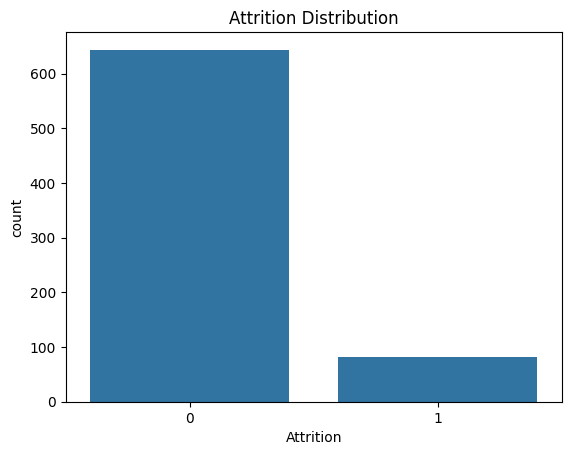

In [ ]:
sns.countplot(x='Attrition',data=df)
plt.title('Attrition Distribution')
plt.show()

2.Gendervs attribution

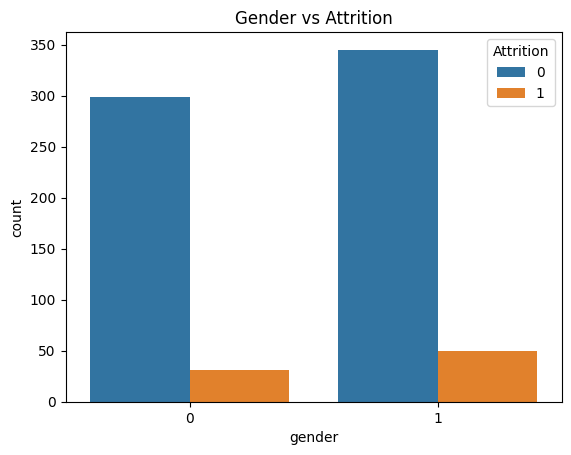

In [ ]:
sns.countplot(x='gender',hue='Attrition',data=df)
plt.title('Gender vs Attrition')
plt.show()
#

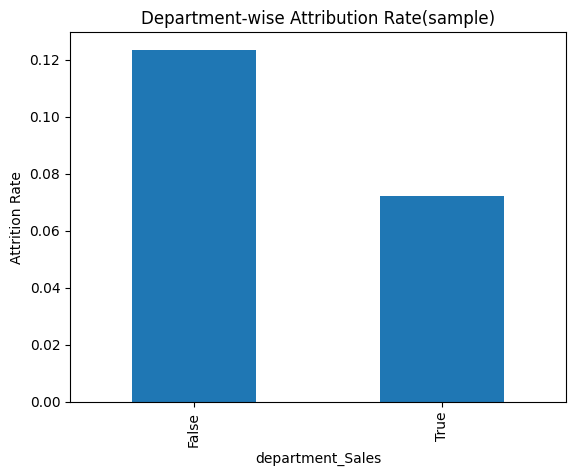

In [ ]:
dept_attr=df.groupby('department_Sales')['Attrition'].mean()
dept_attr.plot(kind='bar')
plt.title("Department-wise Attribution Rate(sample)")
plt.ylabel("Attrition Rate")
plt.show()

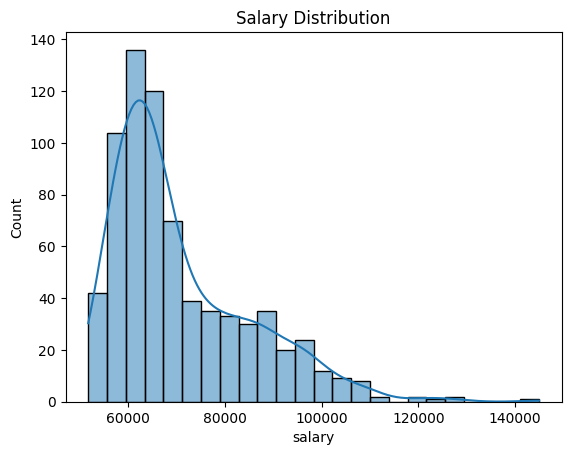

In [ ]:
sns.histplot(df['salary'],kde=True)
plt.title('Salary Distribution')
plt.show()

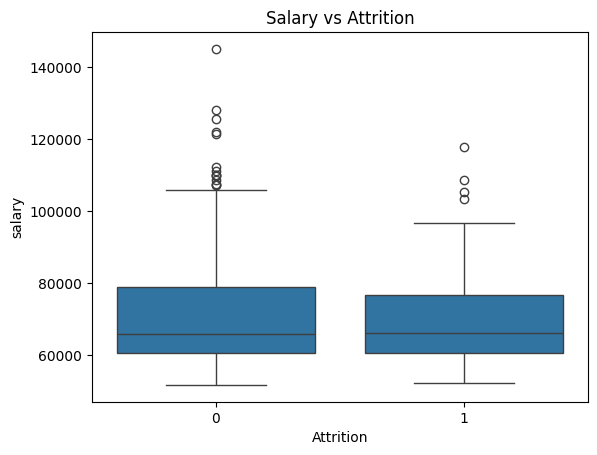

In [ ]:
sns.boxplot(x='Attrition',y='salary',data=df)
plt.title('Salary vs Attrition')
plt.show()

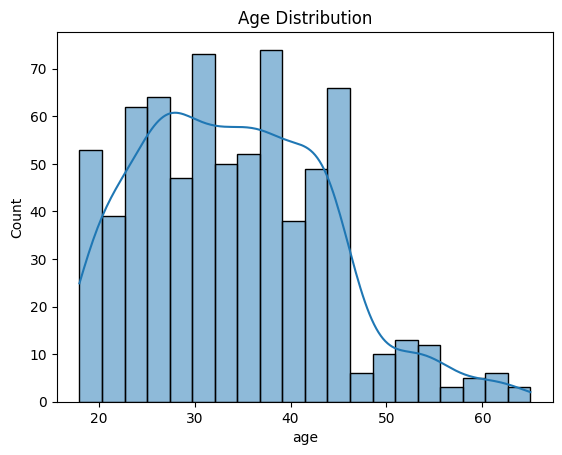

In [ ]:
sns.histplot(df['age'], bins=20,kde=True)
plt.title('Age Distribution')
plt.show()

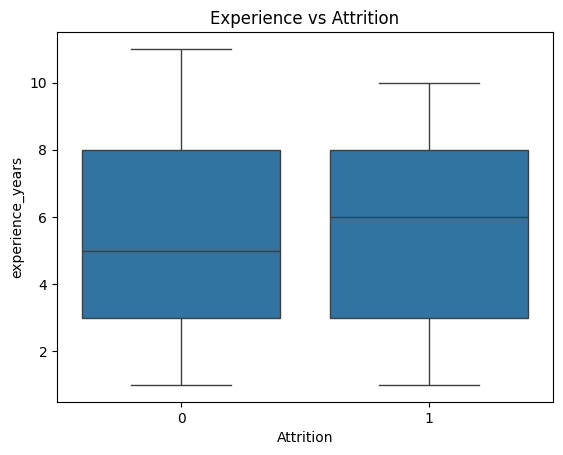

In [ ]:
sns.boxplot(x='Attrition',y='experience_years',data=df)
plt.title('Experience vs Attrition')
plt.show()

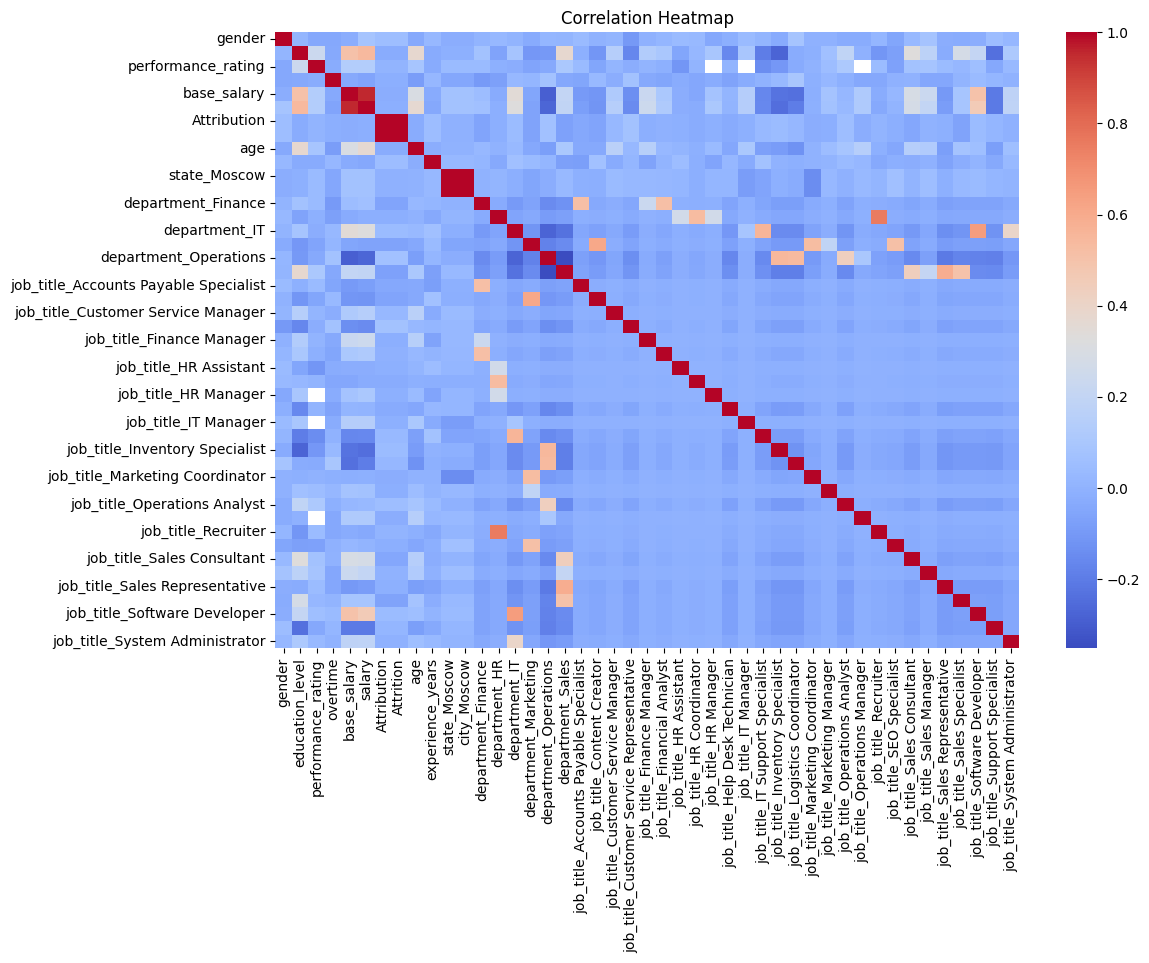

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df['salary_difference']=df['salary']-df['base_salary']

In [ ]:
df.groupby('Attrition')['salary_difference'].mean()

,salary_difference
Attrition,
0,7541.083851
1,7636.061728


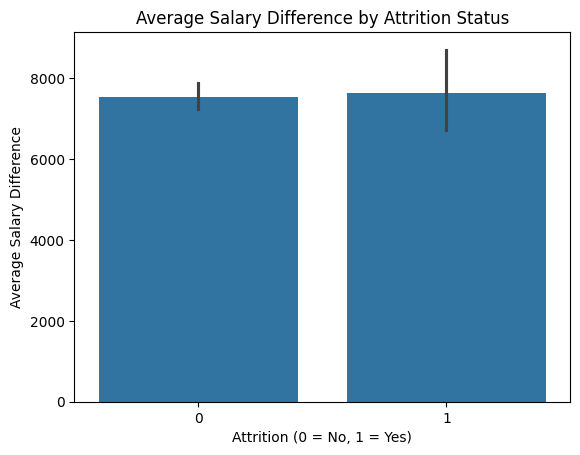

In [ ]:
sns.barplot(x='Attrition', y='salary_difference', data=df)
plt.title('Average Salary Difference by Attrition Status')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Average Salary Difference')
plt.show()